In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import os
import sys
# Add project root to PYTHONPATH
project_root = os.getcwd()
if str(project_root) not in sys.path and project_root.split('/')[-1] == 'chest_ct_retrieval':
    sys.path.append(str(project_root))
elif str(project_root) not in sys.path and project_root.split('/')[-1] == 'notebooks':
    sys.path.append(str(os.path.normpath('/'.join(project_root.split('/')[:-1]))))

%pwd
%cd "E:\\files\\Documents\\Proyecto Proximity\\chest_ct_retrieval"


E:\files\Documents\Proyecto Proximity\chest_ct_retrieval


In [ ]:
import subprocess

%cd "E:\\files\\Documents\\Proyecto Proximity\\chest_ct_retrieval"

process = subprocess.Popen(
    ['python', '-u', 'main.py', '--mode', 'microf1', '--no-optimized-loaders', '--config', 'config/base_local.yaml'],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    universal_newlines=True,
    bufsize=1
)

# Stream output line by line
for line in process.stdout:
    print(line, end='')  # Prevent double newline
process.stdout.close()
process.wait()

E:\files\Documents\Proyecto Proximity\chest_ct_retrieval
CUDA Available: True
Device: cuda:0
Training Mode: microf1
Config: config/base_local.yaml
Optimized Loaders: False
=== MICRO-F1 TRAINING MODE ===

  0%|          | 0/50 [00:00<?, ?it/s]
### EPOCH 1 START ###


  0%|          | 0/192 [00:00<?, ?it/s]outputs: tensor([[ 0.0068, -0.0013, -0.0118, -0.0155],
        [ 0.0454, -0.0021,  0.0103, -0.0085],
        [ 0.0390, -0.0058, -0.0255, -0.0028],
        [ 0.0132, -0.0173, -0.0071,  0.0204],
        [ 0.0250, -0.0464, -0.0029,  0.0330],
        [ 0.0278, -0.0205, -0.0060,  0.0051],
        [ 0.0312, -0.0138,  0.0186, -0.0053],
        [ 0.0030, -0.0395,  0.0005, -0.0244],
        [ 0.0210, -0.0498,  0.0099,  0.0298]], device='cuda:0',
       dtype=torch.float16, grad_fn=<AddmmBackward0>)
target: tensor([[0, 1, 1, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 0],
        [0, 0, 

In [ ]:
import torch
from config.config import load_config
from utils.seed import set_seed
from training.setup import setup_training_run
from training.environment import configure_environment
from eval.metric_loader import load_metrics
from training.data_setup_local import load_dataset_microf1, create_loaders_microf1
from training.model_setup_local import initialize_model_micro_f1
from training.trainer_local_microf1 import Trainer


cuda_available = torch.cuda.is_available()

cfg = load_config("config/base_local.yaml")

set_seed(cfg["training"]["seed"])

run_dirs = setup_training_run(cfg["paths"]["dr2156"]["microf1_runs"])

checkpoints_dir = run_dirs["checkpoints"]
tensorboard_dir = run_dirs["logs"]

configure_environment(cfg)

train_set, test_set, neg_compatibles = load_dataset_microf1(
    cfg["paths"]["dr2156"]["preprocessed_300_int8"], 
    cfg["training"]["seed"], 
    float(cfg["dataset"]["train_frac"]),
    augmentations_arg=cfg["training"]["augmentations"]
)

### MODELO MICRO-F1
p_model, p_loss_fn, p_optimizer, p_scheduler = initialize_model_micro_f1(
    embedding_size=int(cfg["model"]["embedding_size"]),
    lr=float(cfg["training"]["optimizer"]["lr"]),
    weight_decay=float(cfg["training"]["optimizer"]["weight_decay"]),
    cuda=cuda_available
)

loaders = create_loaders_microf1(
    train_set,
    test_set,
    cfg["training"]["batch"]["batch_size"],
    cuda_available
)

p_metrics = load_metrics(cfg)

## MICRO-F1 TRAINING
trainer = Trainer(
    train_loader=loaders["train"],
    val_loader=loaders["test"],
    model=p_model,
    loss_fn=p_loss_fn,
    optimizer=p_optimizer,
    scheduler=p_scheduler,
    n_epochs=cfg["training"]["n_epochs"],
    cuda=cuda_available,
    log_interval=cfg["logging"]["log_interval"],
    checkpoint_dir=checkpoints_dir,
    tensorboard_logs_dir=tensorboard_dir,
    metrics=p_metrics,
    start_epoch=0,
    accumulation_steps=3
)
trainer.fit()


  0%|          | 0/50 [00:00<?, ?it/s]


### EPOCH 1 START ###


  0%|          | 0/288 [00:00<?, ?it/s]

Batch 0/288: Loss = 0.202157
Batch 10/288: Loss = 0.202830


In [2]:
import torch
from config.config import load_config
from utils.seed import set_seed
from training.setup import setup_training_run
from training.environment import configure_environment
from eval.metric_loader import load_metrics

from training.data_setup_local import load_dataset_microf1, create_loaders_microf1
from training.model_setup_local import initialize_model_micro_f1
from training.trainer_local_microf1 import Trainer

print("=== MICRO-F1 TRAINING MODE ===")

# Detect Jupyter environment if not specified

# Setup directories

cuda_available = torch.cuda.is_available()

cfg = load_config("config/base_local.yaml")

run_dirs = setup_training_run(cfg["paths"]["dr2156"]["microf1_runs"])
checkpoints_dir = run_dirs["checkpoints"]
tensorboard_dir = run_dirs["logs"]

# Load dataset with device parameter
train_set, test_set, neg_compatibles = load_dataset_microf1(
    cfg["paths"]["dr2156"]["preprocessed_300_int8"], 
    cfg["training"]["seed"], 
    float(cfg["dataset"]["train_frac"]),
    augmentations_arg=cfg["training"]["augmentations"]
)

# Initialize model
p_model, p_loss_fn, p_optimizer, p_scheduler = initialize_model_micro_f1(
    embedding_size=int(cfg["model"]["embedding_size"]),
    lr=float(cfg["training"]["optimizer"]["lr"]),
    weight_decay=float(cfg["training"]["optimizer"]["weight_decay"]),
    cuda=cuda_available
)


loaders = create_loaders_microf1(
    train_set, 
    test_set, 
    cfg["training"]["batch"]["batch_size"],
    cuda_available
)

# Load metrics
p_metrics = load_metrics(cfg)

=== MICRO-F1 TRAINING MODE ===


In [3]:
p_model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
s_vol, s_label = train_set[4]
s_tensor = torch.tensor(s_vol.copy()).cuda()
output = p_model(s_tensor)

In [ ]:
output

tensor([[ 0.0271,  0.0182, -0.0008, -0.0214]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [5]:
s_label

2

In [8]:
tio_image['data'][0].shape

torch.Size([1, 150, 150])

(1, 300, 150, 150)
[[[[1.87   1.651  1.731  ... 1.513  1.795  1.843 ]
   [1.874  1.512  1.782  ... 1.644  1.548  1.802 ]
   [1.731  1.961  1.587  ... 1.788  1.764  1.785 ]
   ...
   [1.657  1.586  1.736  ... 1.798  1.71   1.725 ]
   [1.729  1.758  1.476  ... 1.8125 1.595  1.502 ]
   [1.738  1.799  1.679  ... 1.643  1.768  1.761 ]]

  [[1.626  1.94   1.824  ... 1.558  1.587  1.571 ]
   [1.789  1.573  2.041  ... 2.012  1.566  1.686 ]
   [1.861  1.624  1.86   ... 1.568  1.76   1.78  ]
   ...
   [1.651  1.646  1.663  ... 1.751  1.729  1.62  ]
   [1.564  1.674  1.542  ... 1.716  1.518  1.691 ]
   [1.6875 1.779  1.686  ... 1.712  1.573  1.742 ]]

  [[1.74   1.741  1.685  ... 1.586  1.878  1.629 ]
   [1.647  1.722  1.541  ... 1.504  1.722  1.706 ]
   [1.721  1.715  1.734  ... 1.763  1.81   1.421 ]
   ...
   [1.617  1.818  1.723  ... 2.006  1.842  1.686 ]
   [1.771  1.65   1.738  ... 1.756  1.733  1.609 ]
   [1.631  1.817  1.584  ... 1.858  1.656  1.573 ]]

  ...

  [[1.692  1.717  1.451  ... 

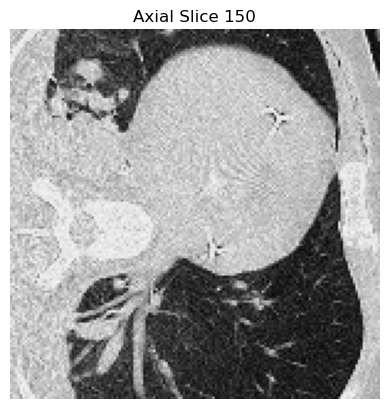

In [19]:
s_vol, s_label = train_set[2]

s_vol = np.transpose(s_vol, axes=[1, 0, 2, 3]) # transpose [D, 1, H, W] to [1, D, H, W]

import matplotlib.pyplot as plt
import torchio as tio
import numpy as np

print(s_vol.shape)
print(s_vol)


resize = tio.Compose([
            #tio.Resize([100, 100, -1], image_interpolation='nearest'),
            tio.RescaleIntensity(out_min_max=(0,1))
        ])

tio_image = tio.ScalarImage(tensor=s_vol.copy(), affine=np.eye(4))
tio_image = resize(tio_image)                

s_vol = tio_image['data'][0]           # remove channel dimension → shape: [D, H, W]

#print(s_vol.shape)
#print(s_vol)

# Select middle slice in the axial (transverse) plane → [z, y, x]
z_index = s_vol.shape[0] // 2
axial_slice = s_vol[120, :, :]

# Plot
plt.imshow(axial_slice.numpy(), cmap='gray')
plt.title(f'Axial Slice {z_index}')
plt.axis('off')
plt.show()


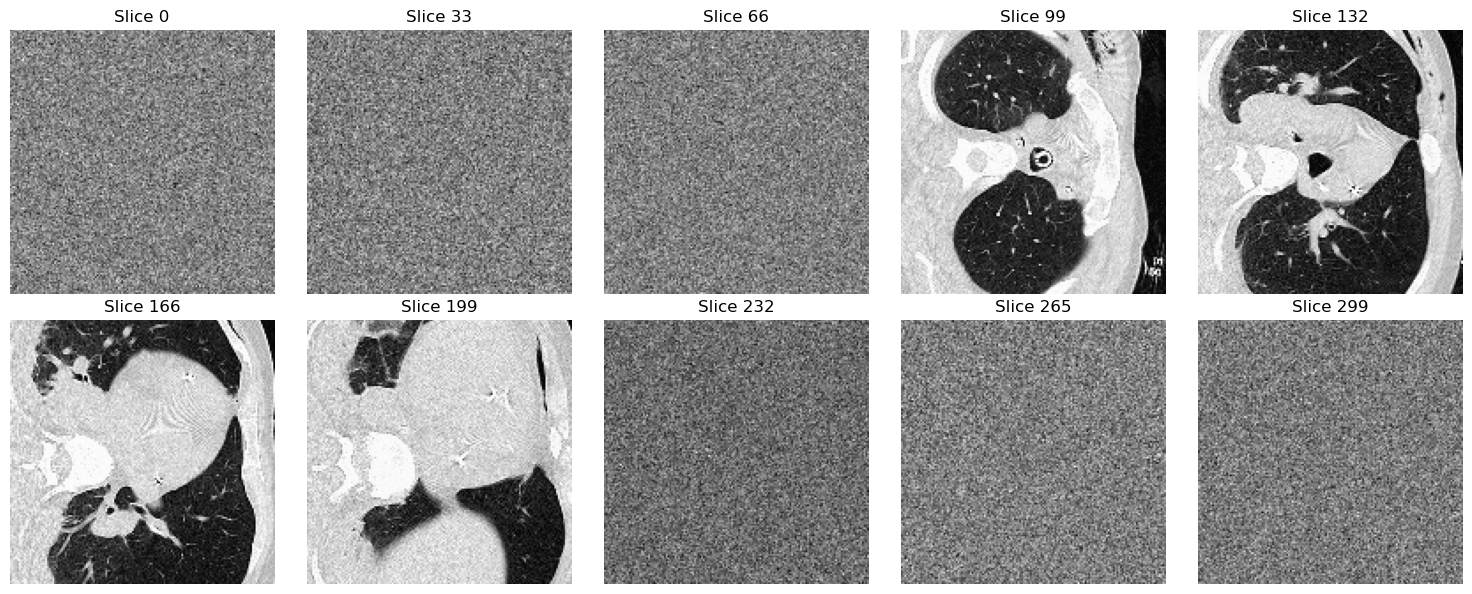

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import torchio as tio

s_vol, s_label = train_set[2]

s_vol = np.transpose(s_vol, axes=[1, 0, 2, 3]) # transpose [D, 1, H, W] to [1, D, H, W]

# Get the 3D volume from the TorchIO subject
resize = tio.Compose([
            #tio.Resize([100, 100, -1], image_interpolation='nearest'),
            tio.RescaleIntensity(out_min_max=(0,1))
        ])

tio_image = tio.ScalarImage(tensor=s_vol.copy(), affine=np.eye(4))
tio_image = resize(tio_image)                

s_vol = tio_image['data'][0]           # remove channel dimension → shape: [D, H, W]

depth = s_vol.shape[0]

# Select 10 equally spaced indices across the depth axis
n_slices = 10
indices = np.linspace(0, depth - 1, n_slices, dtype=int)

# Plot the selected slices in a grid
cols = 5
rows = (n_slices + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
axes = axes.flatten()

for i, idx in enumerate(indices):
    axes[i].imshow(s_vol[idx].numpy(), cmap='gray')
    axes[i].set_title(f'Slice {idx}')
    axes[i].axis('off')

# Hide unused subplots
for ax in axes[n_slices:]:
    ax.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
del tensor, model, subject  # or any other large variables
import gc
gc.collect()
import torch
torch.cuda.empty_cache()